# **Data Preparation**

In [76]:
import pandas as pd

In [77]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'
!wget $data

--2023-01-29 12:39:43--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: 'data.csv.1'

data.csv.1          100%[===================>]   1.41M  4.48MB/s    in 0.3s    

2023-01-29 12:39:44 (4.48 MB/s) - 'data.csv.1' saved [1475504/1475504]



In [78]:
df = pd.read_csv('data.csv')

In [79]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


#### inkonsisten di nama kolom, ada yg pake spasi dan ada pakai underscore
#### Jadikan semua lower case dan pakai underscore

In [80]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')

In [81]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


#### ambil kolom yang string/object.
#### lakukan yg sama dengan nama kolom/kayak diatas

In [82]:
strkolom = df.columns[df.dtypes=='object']
for kolom in list(strkolom):
    df[kolom] = df[kolom].str.lower().str.replace(' ',"_")

In [83]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# **Exploratory Data Analysis**

In [84]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [85]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48
model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914
year
[2011 2012 2013 1992 1993]
28
engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10
engine_hp
[335. 300. 230. 320. 172.]
356
engine_cylinders
[ 6.  4.  5.  8. 12.]
9
transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5
driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4
number_of_doors
[ 2.  4.  3. nan]
3
market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71
vehicle_size
['compact' 'midsize' 'large']
3
vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16
highway_mpg
[26 28 27 25 24]
59
city_mpg
[19 20 18 17 16]
69
popularity
[3916 3105  819  617 1013]
48
msrp
[46135 40650 36350 29450 34500]
6049


## **Visualize Dataset**

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

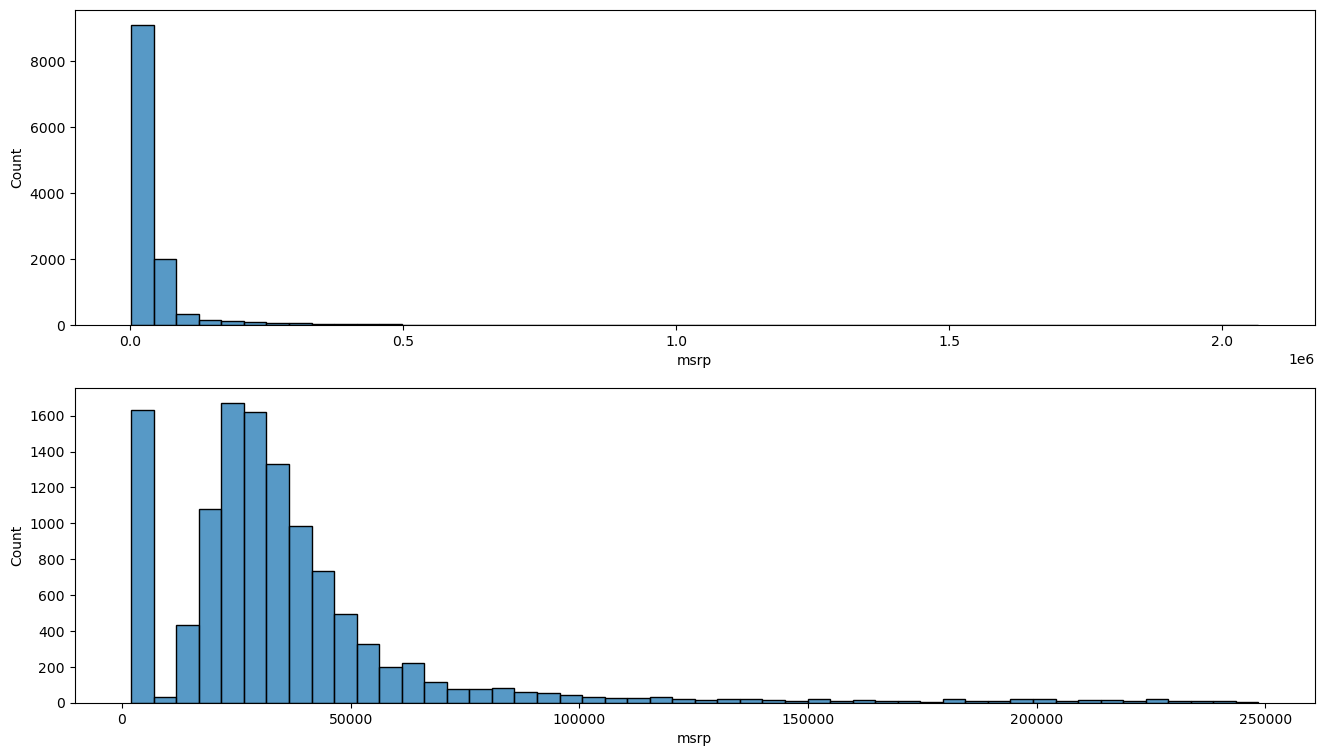

In [87]:
fig, ax = plt.subplots(2,1,figsize=(16,9))
sns.histplot(ax=ax[0],x = df['msrp'], bins=50);
sns.histplot(ax=ax[1],x = df['msrp'][df['msrp'] < 250000], bins=50);

##### dapat dilihat bahwa data memiliki msrp sebagian besar di bawah 0.25*10^6 ==250.000 atau bisa disebut long tail distribution

### ***Data distribution seharusnya yang baik BellShape. Di MSRP terlihat imbalance, jadi jaraknya ada yg jauh tiba2 tinggi dan besar dipinggir bukan ditengah distribusinya. sehaningga harus dinormalisasi***

In [88]:
# pakai numpy logaritma, tpi jika ada angka nol akan error. maka tiap elemen ditambah +1 aja biar adil dan tidak ada data isinya 0
import numpy as np
array = [0,7,6,9,20,15]
np.log(array)
np.log1p(array)

/var/folders/cj/8z1bv1p953g0p_y_b68ql7m80000gn/T/ipykernel_58380/2863910535.py:4: RuntimeWarning: divide by zero encountered in log
  np.log(array)


array([0.        , 2.07944154, 1.94591015, 2.30258509, 3.04452244,
       2.77258872])

In [89]:
msrp_logs = np.log1p(df['msrp'])

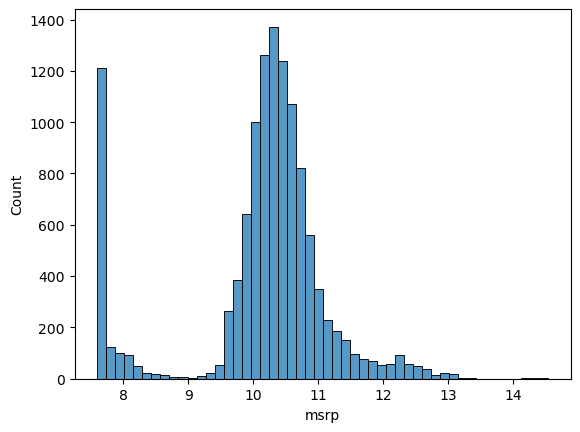

In [90]:
sns.histplot(msrp_logs, bins=50);

#### **Cek Null/Missing Data**

In [91]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

#### **dalam membagi data, jangan lupa untuk mengacak datanya, karena bisa jadi datanya tidak merata. Misal dibagian bawah banyak data mobil bmw sedangkan diatas yang buat training tidak ada maka model akan tidak mengenali**

In [92]:
n = len(df)

In [93]:
n_test = int(n*0.2)
n_val = int(n*0.2)
n_train = n-n_test-n_val #train dapat sisanya aja karena datanya kan dibulatkan 20% nya jadi biar semua data kepakai

In [94]:
idx = np.arange(n) # susun array sejumlah n len data

In [95]:
np.random.seed(10) #biar tiap dieksekusi engga beda2
np.random.shuffle(idx) # acak urutan array
idx

array([11142,  5248,   610, ...,  1344,  7293,  1289])

In [96]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [97]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11142,volvo,v70,2008,premium_unleaded_(recommended),235.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,24,16,870,32465
5248,hyundai,genesis_coupe,2014,premium_unleaded_(recommended),274.0,4.0,manual,rear_wheel_drive,2.0,performance,midsize,coupe,27,19,1439,27200
610,ferrari,575m,2004,premium_unleaded_(required),515.0,12.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,coupe,15,9,2774,217890
4673,ford,fiesta,2015,regular_unleaded,120.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,36,28,5657,14455
8480,suzuki,reno,2007,regular_unleaded,127.0,4.0,manual,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,28,20,481,13599


### terlihat data sudah acak, namun indexnya jadi tidak urut maka perlu drop indexnya

In [98]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

### **target/ylabel**

In [106]:
y_train = np.log1p(df_train['msrp']).values
y_val = np.log1p(df_val['msrp']).values
y_test = np.log1p(df_test['msrp']).values

### **Jangan lupa delete y atau target yg ada di masing2 dataset**

In [109]:
df_train.drop(columns = 'msrp',inplace=True)
df_val.drop(columns = 'msrp',inplace=True)
df_test.drop(columns = 'msrp',inplace=True)

In [114]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,volvo,v70,2008,premium_unleaded_(recommended),235.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,24,16,870
1,hyundai,genesis_coupe,2014,premium_unleaded_(recommended),274.0,4.0,manual,rear_wheel_drive,2.0,performance,midsize,coupe,27,19,1439
2,ferrari,575m,2004,premium_unleaded_(required),515.0,12.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,coupe,15,9,2774
3,ford,fiesta,2015,regular_unleaded,120.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,36,28,5657
4,suzuki,reno,2007,regular_unleaded,127.0,4.0,manual,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,28,20,481


# **LINEAR REGRESSION**

### **Logaritma kebalikannya adalah Exponen** . Jadi setelah dapat y predict nya jangan lupa dibalikkan ke aslinya

#### untuk contoh , feature yg digunakan hanya misal engine_hp, city_mpg, popularity


## Notes
Model for solving regression tasks, in which the objective is to adjust a line for the data and make predictions on new values. The input of this model is the **feature matrix** `X` and a `y` **vector of predictions** is obtained, trying to be as close as possible to the **actual** `y` values. The linear regression formula is the sum of the bias term \( $w_0$ \), which refers to the predictions if there is no information, and each of the feature values times their corresponding weights as \( $x_{i1} \cdot w_1 + x_{i2} \cdot w_2 + ... + x_{in} \cdot w_n$ \).

So the simple linear regression formula looks like:

$g(x_i) = w_0 + x_{i1} \cdot w_1 + x_{i2} \cdot w_2 + ... + x_{in} \cdot w_n$.

And that can be further simplified as:

$g(x_i) = w_0 + \displaystyle\sum_{j=1}^{n} w_j \cdot x_{ij}$

Here is a simple implementation of Linear Regression in python:

~~~~python
w0 = 7.1
def linear_regression(xi):  
    n = len(xi)
    
    pred = w0
    w = [0.01, 0.04, 0.002]
    for j in range(n):
        pred = pred + w[j] * xi[j]
    return pred

In [117]:
df_train.iloc[10]

make                                         bmw
model                                         x4
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  240.0
engine_cylinders                             4.0
transmission_type                      automatic
driven_wheels                    all_wheel_drive
number_of_doors                              4.0
market_category                 crossover,luxury
vehicle_size                             midsize
vehicle_style                            4dr_suv
highway_mpg                                   28
city_mpg                                      20
popularity                                  3916
Name: 10, dtype: object

In [118]:
xi = [240,20,3916]

In [126]:
#misal weighted atau bagian yg akan dikali yh hasil training misal . buat contoh aja
w0 = 7.17
w = [0.01,0.04,0.002]

In [122]:
def linear_regression(xi):
    n = len(xi)
    pred = w0
    for j in range(n):
        pred = pred + w[j] * xi[j]
    return pred

In [124]:
linear_regression(xi)

18.202

In [125]:
np.expm1(18.202)

80357821.44137533

# **Validation Framework. Biasanya 60% training, 20% tes, 20% validation atau bisa bervariasi**